# Exploratory Data Analysis
<img src='https://cdn.discordapp.com/attachments/659054232632164355/936889608271200297/wallhaven-013q51.png'></img>

# 1. Introduction to the Dataset And The Aim of the EDA

<YOUR DESCRIPTION HERE>

This [dataset](https://www.youtube.com/watch?v=dQw4w9WgXcQ) is described as such and is made out of of this and that feature, whatever

## 1.1 Library Setup and Read in the Data

In [65]:
#pip install pandas

In [66]:
#pip install matplotlib

In [67]:
#pip install seaborn

In [68]:
#pip install sklearn

In [69]:
#pip install empiricaldist

In [70]:
#pip install missingno

In [71]:
#pip install tqdm

In [72]:
# Base libraries
import time
import datetime
import os

# Scientific libraries
import numpy as np
import pandas as pd
import sklearn
from empiricaldist import Cdf, Pmf

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno  # Visualize missing values

# Helper libraries
from tqdm.notebook import tqdm, trange
from colorama import Fore, Back, Style
import warnings
warnings.filterwarnings('ignore')

# Visual setup
import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit

# Seed value for numpy.random
np.random.seed(69)

Load the dataset:

In [73]:
dataset = 'website/static/downloads/export_alimconfiance.csv'
dataframe = pd.read_csv(dataset, sep=";")
dataframe.head()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240.0,MALAKOFF,15914760,2021-03-03T01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Alimentation générale,Autres
1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500.0,BRON,16252422,2021-11-26T01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Restaurant,Autres
2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800.0,PUTEAUX,15903092,2021-02-22T01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Alimentation générale,Autres
3,JARDINERIE DE CHEVREUSE (JARDINERIE ...,30890741900011,LE BREUIL,78460.0,CHEVREUSE,15901554,2021-02-19T01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",NaN,Autres
4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290.0,VILLENEUVE LE ROI,15968279,2021-04-14T02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Alimentation générale,Autres


We will start with basic exploration of the dataset and get a feel for how it looks.

In [74]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35555 entries, 0 to 35554
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   APP_Libelle_etablissement           35555 non-null  object 
 1   SIRET                               35555 non-null  object 
 2   Adresse_2_UA                        35105 non-null  object 
 3   Code_postal                         35545 non-null  float64
 4   Libelle_commune                     35555 non-null  object 
 5   Numero_inspection                   35555 non-null  object 
 6   Date_inspection                     35555 non-null  object 
 7   APP_Libelle_activite_etablissement  35555 non-null  object 
 8   Synthese_eval_sanit                 35555 non-null  object 
 9   Agrement                            9950 non-null   object 
 10  geores                              34960 non-null  object 
 11  filtre                              25756

### Dataset Columns Description

There are **13 columns** and **several of them have missing values**. 

- **APP_Libelle_etablissement**
    - *Raison sociale de l'établissement*
- **SIRET**
    - Le numéro SIRET *(pour « système d'identification du répertoire des établissements »)* permet d'identifier chaque établissement qui compose une entreprise. Il est composé de 14 chiffres.
- **Adresse_2_UA**
    - Adresse de l'établissement. *(=! siège social)*
- **Code_postal**                         
    - Code postal de la commune où se trouve l'établissement.
- **Libelle_commune**                     
    - Commune où se trouve l'établissement.
- **Numero_inspection**                
    - Valeur **unique** attachée à une action d'inspection passée, structure inconnue, valeurs non-séquentielles.
- **Date_inspection**                   
    - Date attachée à une action d'inspection passée, format YYYY-MM-DDT00:00:00+01:00 *(ajustement fuseau horaire)*
- **APP_Libelle_activite_etablissement**  
    - Description officielle des types d'activités tel que décidé par le Ministère de l'Agriculture et de l'Alimentation. Regroupement des activités de transformation et de distribution de produits alimentaires pratiquées au sein de l'établissement.
- **Synthese_eval_sanit**                 
    - Résultat attaché à une action d'inspection passée, format "Très Satisfaisant", "Satisfaisant", "A améliorer", "A corriger de manière urgente"
- **Agrement**                            
    - Délivré par le Ministère de l'Agriculture et de l'Alimentation, atteste que l'établissement est autorisé à pratiquer une ou plusieurs activités contrôlés par agrément. Recherche laisse à penser que les agréments dans les datasets sont tronqués de certaines informations. *~~[Code ISO pays]~~ [Numéro d'agrément] ~~[Union Européenne]~~*
- **geores**                              
    - Coordonnées géographiques 2D de la position de l'établissement. *(standard GPS)*
- **filtre**                              
    - Hypothèse: classification utilisée en interne par les équipes d'inspection pour simplfier la catégorisation des activités d'un établissement.
- **ods_type_activite**                   
    - Description non-officielle des types d'activités tels que décidés par Alim'Confiance. *(=! libellé des activités de l'établissement)*


### Dataset Defects Checklist

- Some **'SIRET'** values appear attached to different locations which is both impossible and legally reprehensible. We can assume this is not an error but rather a will to unify all locations belonging to the same chain under one individual identifiable value and thus part of the organization internal data storage policies. Some SIRET numbers are also prefixed with a letter that we can only assume is not random. The impact is however limited seeing as these outliers are all unique in the dataset.
- **'Code_postal'** has a few missing values. Some values are set as '000NR' as a stand in for N/A.
- **'Date_inspection'** is not to datetime format.
- **'APP_Libelle_activite_etablissement'** all activities are on the same line, they will need to be split onto individual lines prior to encoding.
- **Agrement** I have not been able to correlate the 'agrément' with the activity that it has been delivered for; worth noting some lines have multiple 'agrements', further compounding the identification issue stated earlier.


In [75]:
dataframe.isnull().sum()

APP_Libelle_etablissement                 0
SIRET                                     0
Adresse_2_UA                            450
Code_postal                              10
Libelle_commune                           0
Numero_inspection                         0
Date_inspection                           0
APP_Libelle_activite_etablissement        0
Synthese_eval_sanit                       0
Agrement                              25605
geores                                  595
filtre                                 9799
ods_type_activite                         0
dtype: int64

*here, a commentary about how things have lots or not lots of NaN*

### Suggested Actions
- Adress missing values: drop? replace?
- Information that will not be needed for the model: drop? plot? reconsider? 
- Incorrect data types: fix? convert to object?
- Several features could benefit from being merged: merge into a broader category? drop smaller elements? duplicate hybrids across all component categories?

### Label Parameters

In [76]:
target_label = 'Synthese_eval_sanit'
base_target = dataframe[target_label]

## 2.2 Data Cleaning

### Drop unnecessary columns

In [77]:
""" # Specify the cols to drop
to_drop = [
    'SIRET'
]

# Drop them
dataframe.drop(to_drop, axis='columns', inplace=True) """

" # Specify the cols to drop\nto_drop = [\n    'SIRET'\n]\n\n# Drop them\ndataframe.drop(to_drop, axis='columns', inplace=True) "

### Collapse multiple categories into one

In [78]:
""" # Collapse 'Category 1' and 'Category 2' into 'Category 1' (e.g: Collapse 'Music' and 'Music & Audio' into 'Music')
dataframe['filtre'] = dataframe['filtre'].str.replace('ods_type_activite', 'filtre') """

" # Collapse 'Category 1' and 'Category 2' into 'Category 1' (e.g: Collapse 'Music' and 'Music & Audio' into 'Music')\ndataframe['filtre'] = dataframe['filtre'].str.replace('ods_type_activite', 'filtre') "

### Deal With Missing Values

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

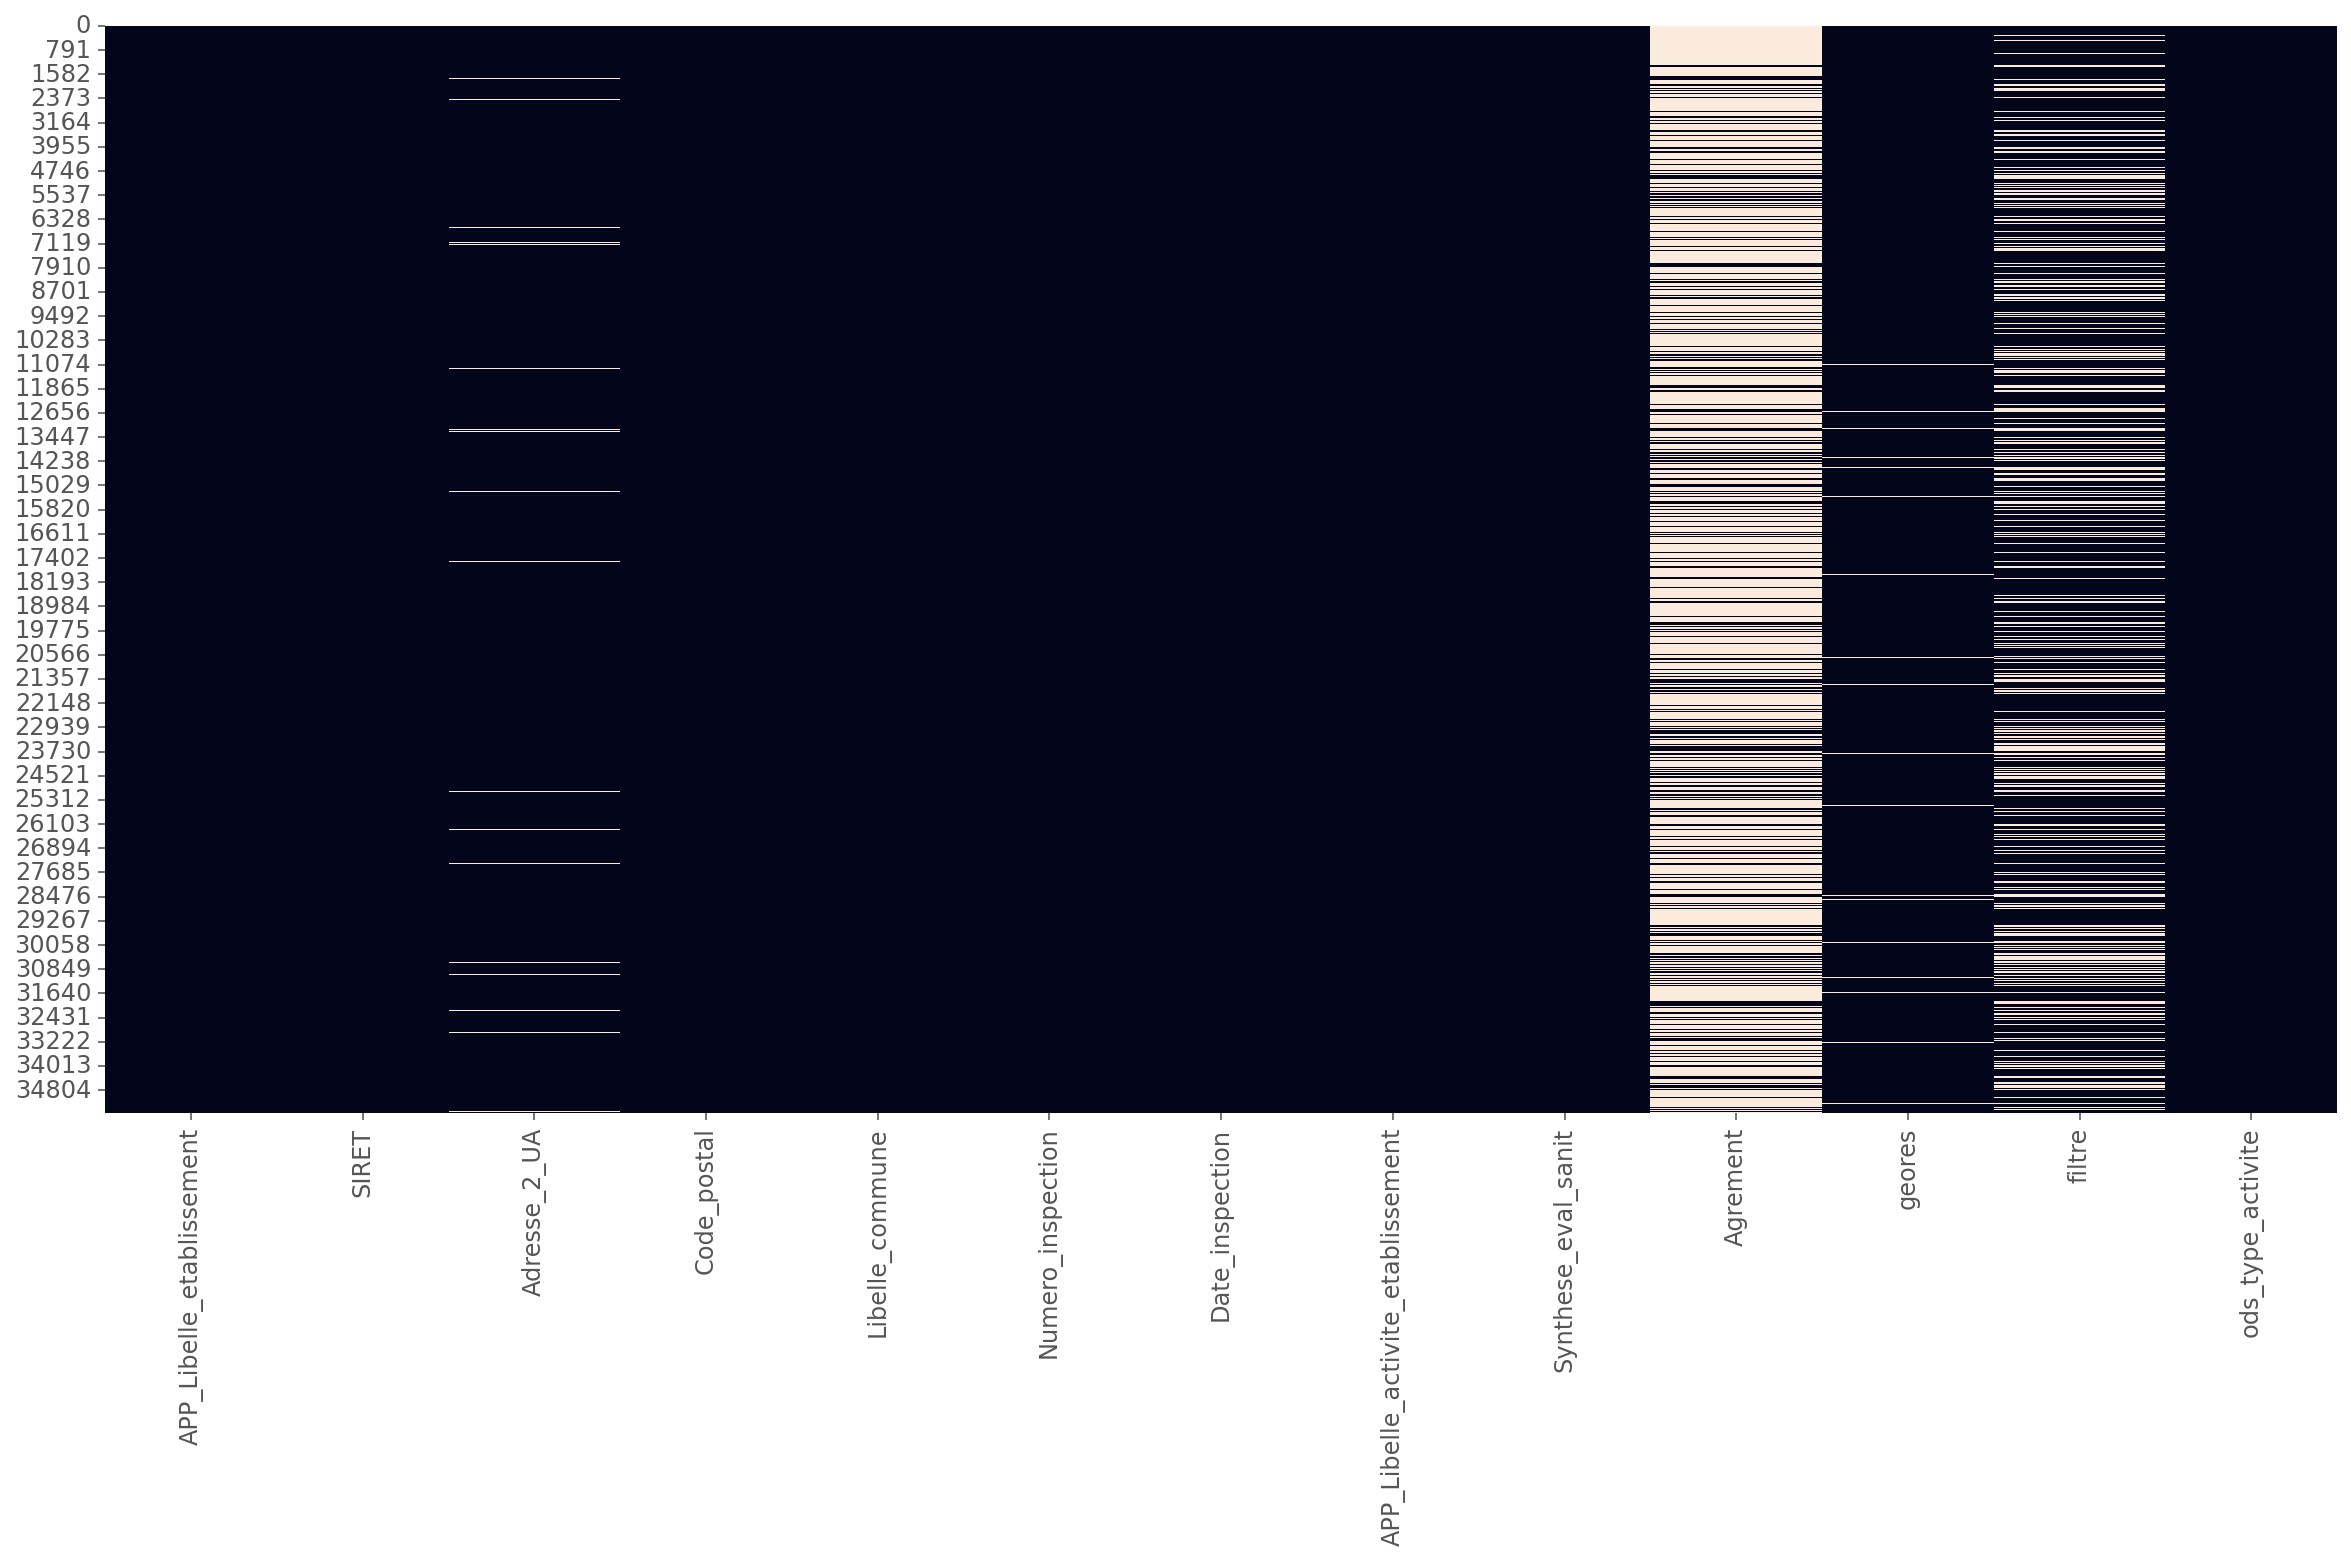

In [79]:
plt.figure(figsize=(20,10))
sns.heatmap(dataframe.isna(), cbar=False)

# 3. Univariate Exploration

In [80]:
import sqlite3
database = "C:/Users/Pontiff/Desktop/SIMPLON_DEV_IA_DOCUMENTS_THIBAUT_PERNET/-G6-L-IA-au-service-de-la-s-curit-alimentaire/website/alim_confiance.db"

conn = sqlite3.connect(database)

df1 = pd.read_sql("select store_industry from raw_data", con=conn)
df2 = pd.read_sql("select inspection_result from inspection_data", con=conn)
print(df1)
print(df2)
conn.close()

                               store_industry
0                       Alimentation générale
1                                  Restaurant
2                       Alimentation générale
3                                           _
4                       Alimentation générale
...                                       ...
37123                 Restauration collective
37124                 Restauration collective
37125                              Restaurant
37126                 Restauration collective
37127  Transformation de produits de la pêche

[37128 rows x 1 columns]
       inspection_result
0           Satisfaisant
1      Très satisfaisant
2      Très satisfaisant
3           Satisfaisant
4           Satisfaisant
...                  ...
37123       Satisfaisant
37124       Satisfaisant
37125       Satisfaisant
37126       Satisfaisant
37127  Très satisfaisant

[37128 rows x 1 columns]


In [81]:
newdf = pd.concat([df1, df2], axis=1)
# Import encoders.
from sklearn.preprocessing import LabelEncoder

# Create the encoders.
label_encoder = LabelEncoder()
newdf['inspection_result'] = label_encoder.fit_transform(newdf['inspection_result'])
newdf['inspection_result'].value_counts()

2    19666
3    15562
0     1777
1      123
Name: inspection_result, dtype: int64

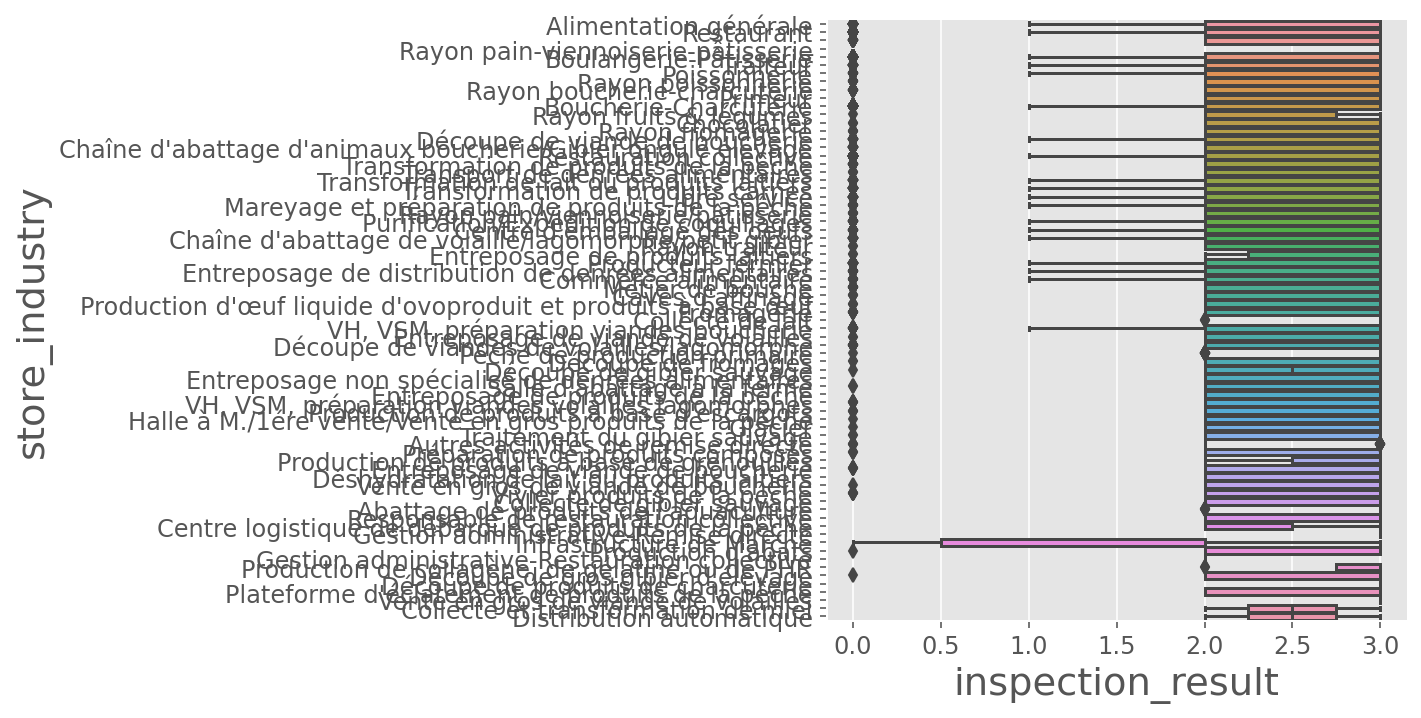

In [86]:
sns.catplot(kind='box', y='store_industry', x='inspection_result', data=newdf)

<AxesSubplot:xlabel='inspection_result', ylabel='store_industry'>

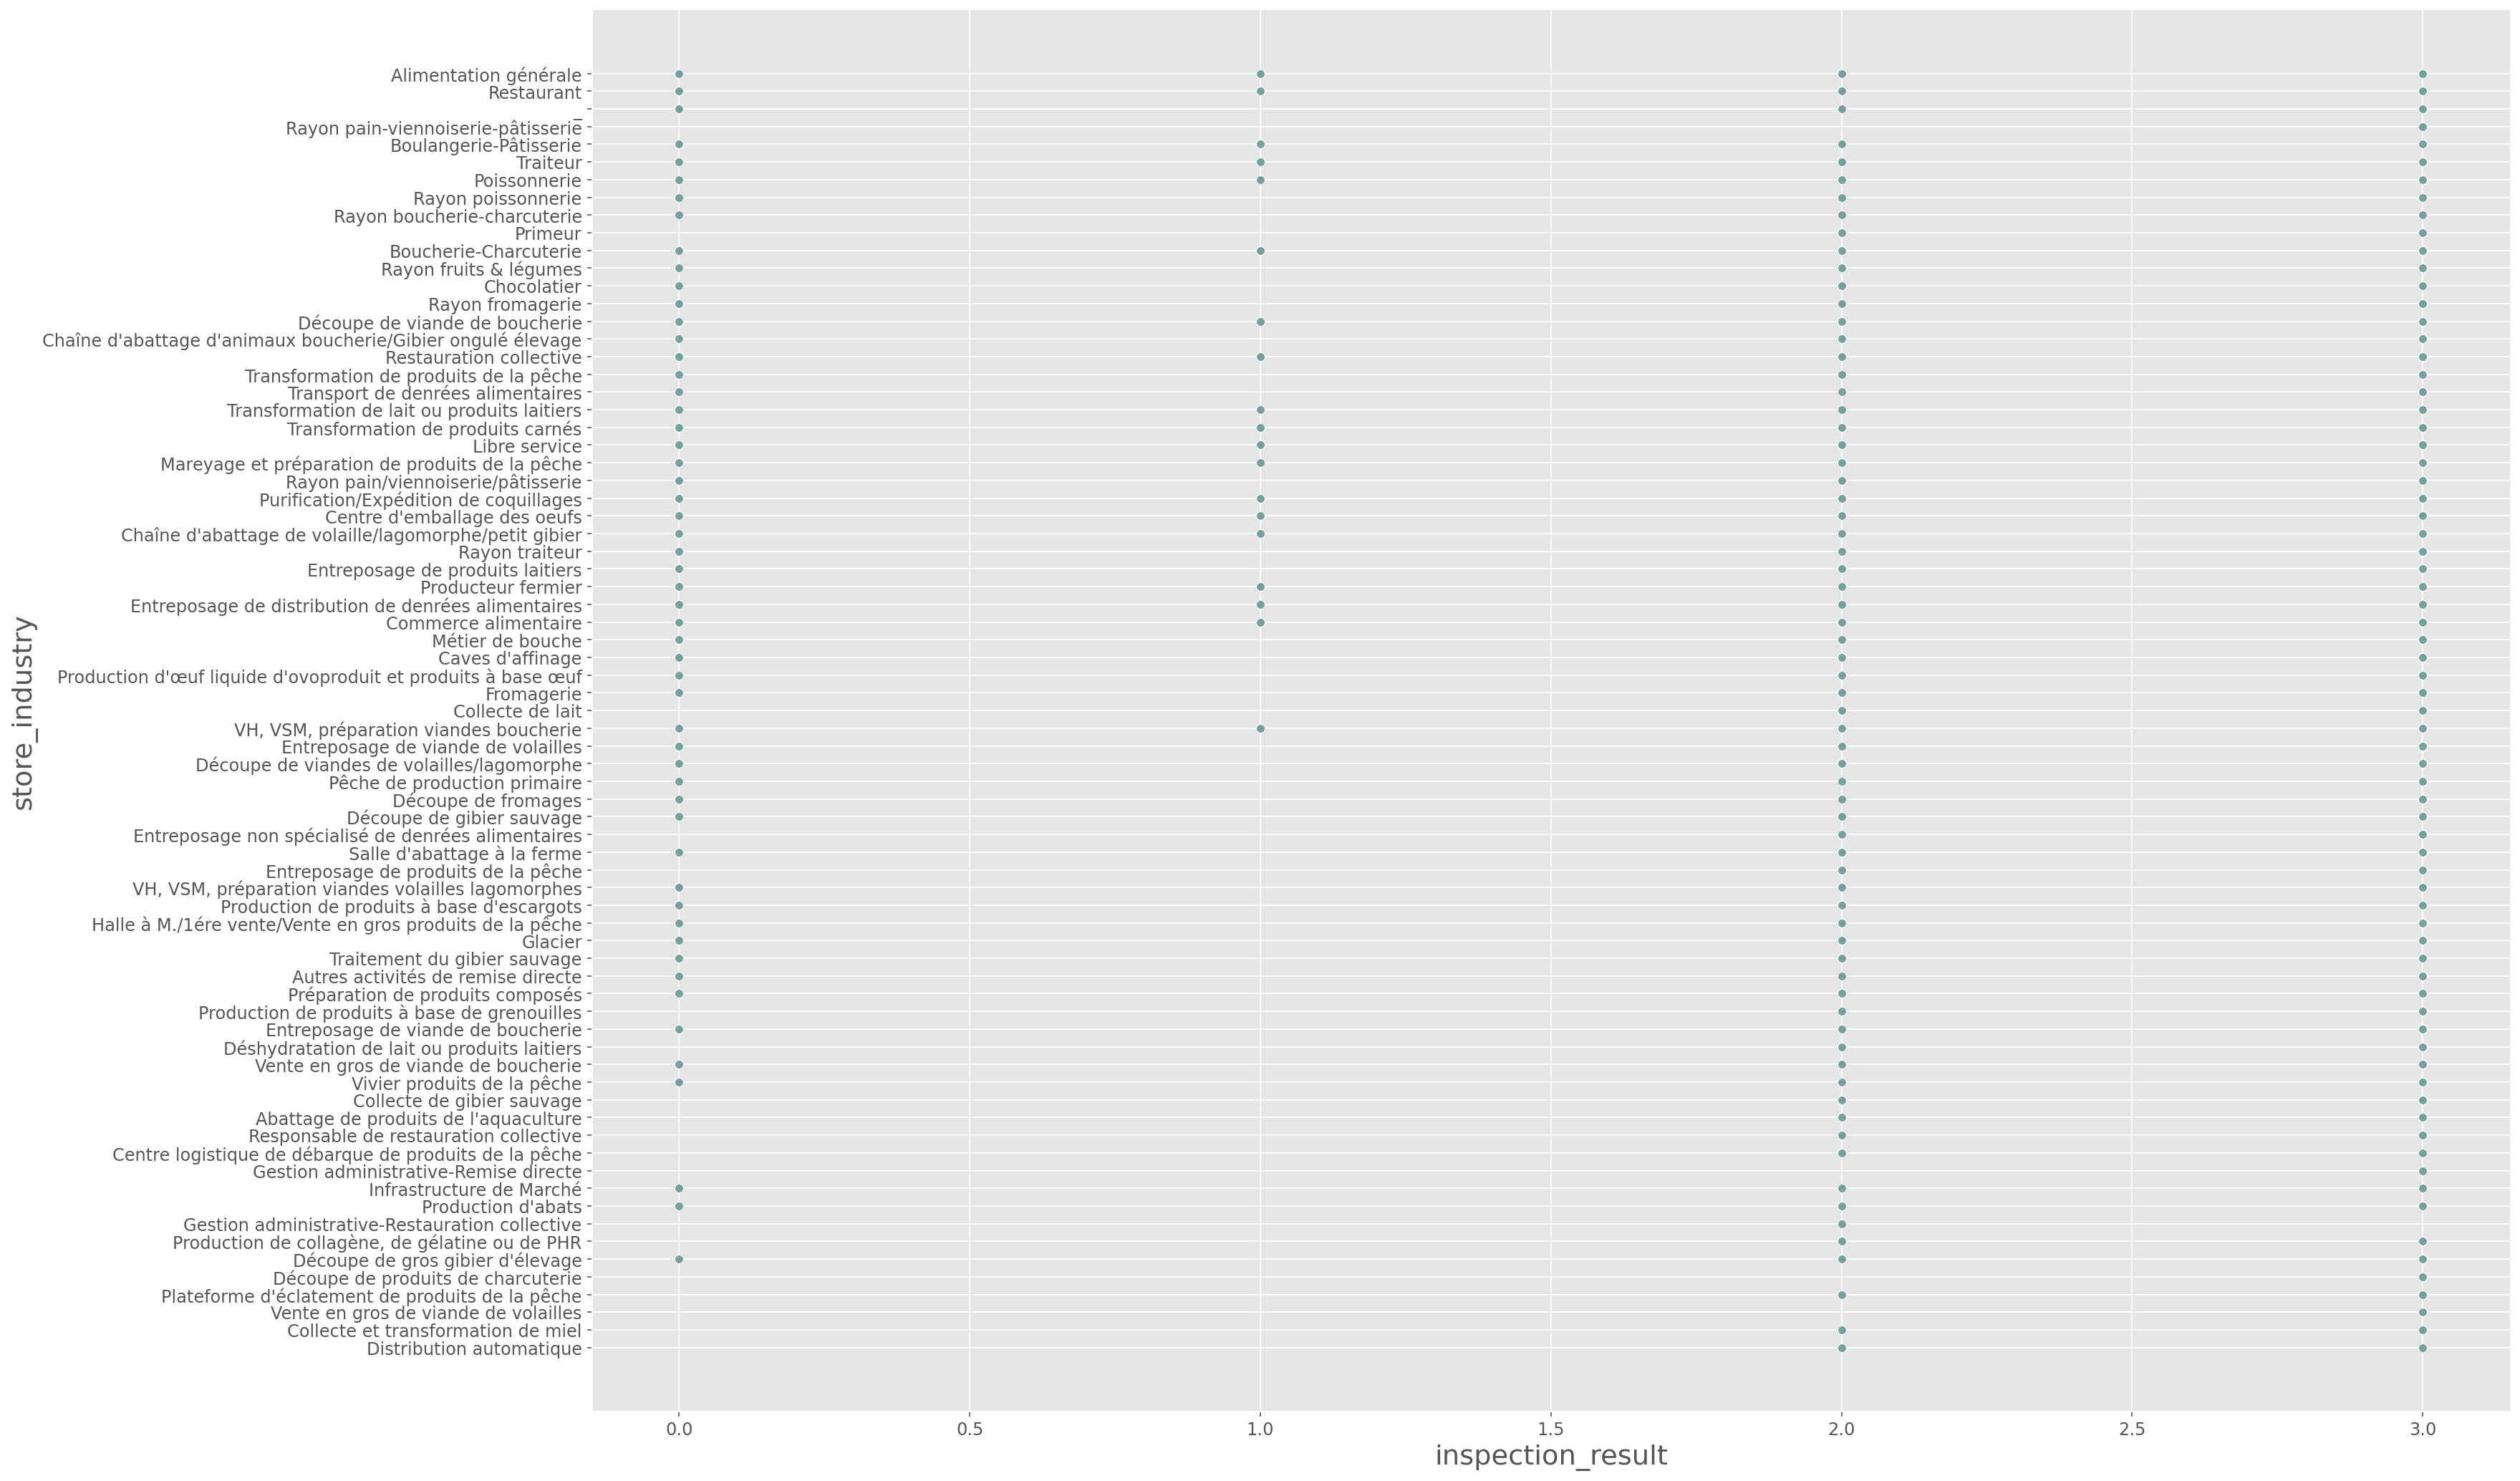

In [91]:
sns.scatterplot(y='store_industry', x='inspection_result', data=newdf)

# 4. Bivariate Exploration

# 5. Multivariate Exploration

# 6. Brief Conclusion of the EDA

Here my conclusions or whatever, I don't fucking care anymore.